# Homework 3 
### ASTROINFORMATICS

## Problem 1

We learned this week that the posterior pdf for $b$, the tail probability when
flipping a coin, with a flat prior in the range 0-1, is
$$ p(b \,|\, k, N ) = C \, b^k \, (1-b)^{N-k}, $$
where the normalization constant $C$ can be determined from the condition $\int_0^1 p(b\,|\,k,N)\, db = 1$.

Get a coin, flip it 8 times and record the results.

a) plot $p(b \,|\, k, N )$ after each flip. Every time show the previous (prior) $p(b)$
and the posterior $p(b)$. 

b) After all 8 flips, what is the probability that your coin strongly prefers
heads over tails: what is the probability $p(b<0.25\,|\, k, N )$)? 


## Problem 2

Fit polynomials of up to the 5th order to the provided dataset.
Use BIC to find the best model for this dataset.

## Problem 3 

Apply Bayesian Blocks Algorithm to period distribution (logP) of LINEAR variable stars. 
Plot histograms on both linear and log scale. Compare the result to classical (Knuth's) 
uniform bin width histogram. 


### Some useful definitions and functions

In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import stats
from astroML.datasets import fetch_LINEAR_geneva
from astroML.plotting import setup_text_plots
from astroML.plotting import hist

setup_text_plots(fontsize=8, usetex=False)

## Problem 1: the coin flip
a) plot $p(b \,|\, k, N )$ after each flip. Every time show the previous (prior) $p(b)$
and the posterior $p(b)$. 

b) After all 8 flips, what is the probability that your coin strongly prefers
heads over tails: what is the probability $p(b<0.25\,|\, k, N )$)? 

results for my coin 4:head, 4:tail


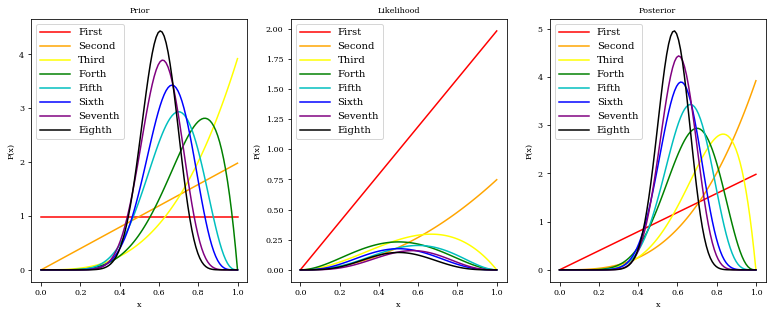

In [2]:
np.random.seed(42)

flipdata = np.array([0, 0, 1, 1, 0, 1, 0, 1])  # Known data
N = len(flipdata)                              # Number of throw   
head = 0                                       # Number of heads
tail = 0                                       # Number of tails

### I present each throw with different color
color = ['red','orange','yellow','g','c','b','purple','k']
label=['First', 'Second', 'Third', 'Forth','Fifth', 'Sixth', 'Seventh', 'Eighth']


fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15,wspace=0.2)
ax1 = fig.add_subplot(131)   
ax2 = fig.add_subplot(132)   
ax3 = fig.add_subplot(133)

### Each Nth throw contains 100 points which correspond to probability  of b = np.linspace(0, 1, 100)
prior=np.zeros(shape=(N,100))
posterior=np.zeros(shape=(N,100))
likelihood=np.zeros(shape=(N,100))

### General idea: 
### At first throw, the prior is assumed flat. 
### The likelihood at each throw depends on how many heads and tails there are.
### Posterior equals to prior*likelihood, which becomes the next prior of the next throw.
for i in range(N):
    if flipdata[i]==0:
        head += 1
    else:
        tail += 1    
    total = head+tail
    b = np.linspace(0, 1, 100)
    db = b[1] - b[0]
    
    for j in range(100): 
        likelihood[i][j] = (math.factorial(total)/(math.factorial(head)*math.factorial(tail))) *(b[j]**(head))*((1.0-b[j])**(tail))
        prior[0][j] = db
        if i == N-1:
            posterior[i][j] = prior[i][j]*likelihood[i][j]
        else:
                
            posterior[i][j] = prior[i][j]*likelihood[i][j]
            prior[i+1][j] = posterior[i][j]
    likelihood[i] /= likelihood.sum()
    likelihood[i] /= db     
    prior[i] /= prior[i].sum()   
    prior[i] /= db 
    posterior[i] /= posterior[i].sum()   
    posterior[i] /= db 
        
    
    ax1.plot(b, prior[i], '-',color=color[i],label=label[i]);
    ax2.plot(b,likelihood[i],'-',color=color[i],label=label[i])
    ax3.plot(b, posterior[i], '-',color=color[i],label=label[i]);
    
ax1.legend(loc=2,prop=dict(size=10))    
ax2.legend(loc=2,prop=dict(size=10))   
ax3.legend(loc=2,prop=dict(size=10))   
ax1.set_xlabel('x')
ax1.set_ylabel('P(x)')
ax1.set_title('Prior')
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)')
ax2.set_title('Likelihood')
ax3.set_xlabel('x')
ax3.set_ylabel('P(x)')
ax3.set_title('Posterior')


print(r"results for my coin %i:head, %i:tail"%(head,tail))
 

In [3]:
posterior[7][:25].sum()

0.0007343010078383451

We can see from  the eighth throw of posterior plot that the the probability $p(b<0.25\,|\, k, N )$) is the sum of previous 25 elements in the posterior, 0.000734.

Results for my coin 3:head, 5:tail


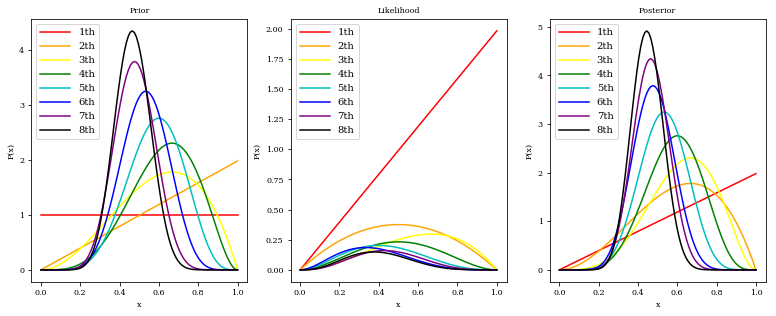

In [4]:
### If I creat my own random data points for 8 times. 

from random import *

N=8
m = np.zeros(shape=N)
for i in range(N):
    m[i] = randint(0,1)


prior=np.zeros(shape=(N,100))
posterior=np.zeros(shape=(N,100))
likelihood=np.zeros(shape=(N,100))


fig = plt.figure(figsize=(12, 5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15,wspace=0.2)
ax1 = fig.add_subplot(131)   
ax2 = fig.add_subplot(132)   
ax3 = fig.add_subplot(133)
color = ['red','orange','yellow','g','c','b','purple','k']
label=['First', 'Second', 'Third', 'Forth','Fifth', 'Sixth', 'Seventh', 'Eighth']

    
head,tail=0,0
for i in range(N):
    if m[i]==0:
        head += 1
    else:
        tail += 1    
    total = head+tail    
    name = np.linspace(1,N,N)
    
    b = np.linspace(0.001, 1, 100)
    db = b[1] - b[0]
        
    for j in range(100): 
        likelihood[i][j] = math.factorial(total)/(math.factorial(head)*math.factorial(tail))*b[j]**head*(1.0-b[j])**(tail)
            
        prior[0][j] = db
        if i == N-1:
            posterior[i][j] = prior[i][j]*likelihood[i][j]
        else:            
            posterior[i][j] = prior[i][j]*likelihood[i][j]
            prior[i+1][j] = posterior[i][j]
    likelihood[i] /= likelihood.sum()
    likelihood[i] /= db     
    prior[i] /= prior[i].sum()   
    prior[i] /= db 
    posterior[i] /= posterior[i].sum()   
    posterior[i] /= db 
        
    ax1.plot(b, prior[i], '-',color=color[i],label='%ith'%name[i]);
    ax2.plot(b,likelihood[i],'-',color=color[i],label='%ith'%name[i])
    ax3.plot(b, posterior[i], '-',color=color[i],label='%ith'%name[i]);
    
ax1.legend(loc=2,prop=dict(size=10))    
ax2.legend(loc=2,prop=dict(size=10))   
ax3.legend(loc=2,prop=dict(size=10))   
ax1.set_xlabel('x')
ax1.set_ylabel('P(x)')
ax1.set_title('Prior')
ax2.set_xlabel('x')
ax2.set_ylabel('P(x)')
ax2.set_title('Likelihood')
ax3.set_xlabel('x')
ax3.set_ylabel('P(x)')
ax3.set_title('Posterior')


print(r"Results for my coin %i:head, %i:tail"%(head,tail))
    

Text(0.6,0.9,'3 heads, 5 tails.')

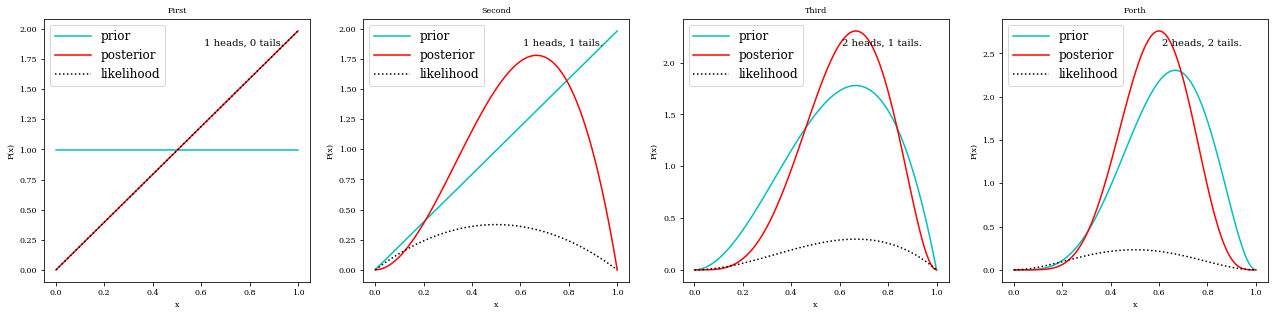

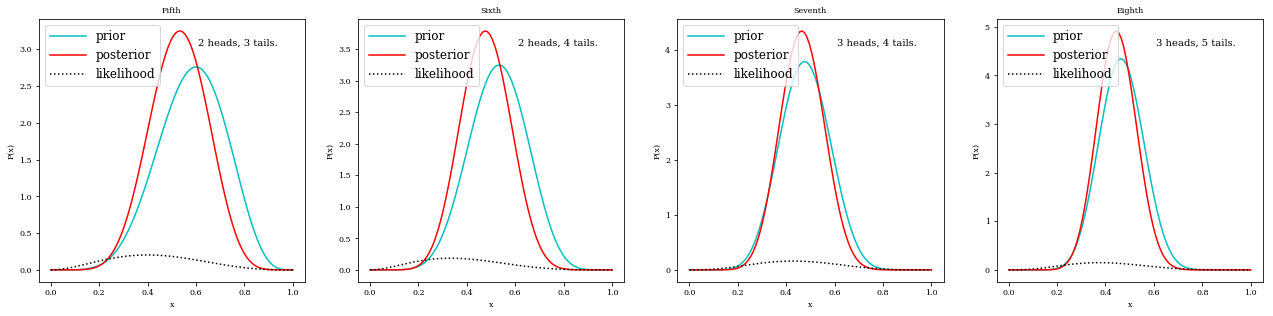

In [5]:
### Here, I plotted prior, likelihood and posterior of each throw in specific plot. THee data come from the last cell.

def pb(N):    
    prior=np.zeros(shape=(N,100))
    posterior=np.zeros(shape=(N,100))
    likelihood=np.zeros(shape=(N,100))
    
    head,tail=0,0
    for i in range(N):
        if m[i]==0:
            head += 1
        else:
            tail += 1    
        total = head+tail    
        name = np.linspace(1,N,N)
    
        b = np.linspace(0.001, 1, 100)
        db = b[1] - b[0]
        
        for j in range(100): 
            likelihood[i][j] = math.factorial(total)/(math.factorial(head)*math.factorial(tail))*b[j]**head*(1.0-b[j])**(tail)
            
            prior[0][j] = db
            if i == N-1:
                posterior[i][j] = prior[i][j]*likelihood[i][j]
            else:            
                posterior[i][j] = prior[i][j]*likelihood[i][j]
                prior[i+1][j] = posterior[i][j]
        likelihood[i] /= likelihood.sum()
        likelihood[i] /= db     
        prior[i] /= prior[i].sum()   
        prior[i] /= db 
        posterior[i] /= posterior[i].sum()   
        posterior[i] /= db 
        
        
    return likelihood[N-1],prior[N-1],posterior[N-1], head, tail
    
    
likelihood,prior,posterior, head, tail = pb(1)
fig1 = plt.figure(figsize=(20,5))
fig1.subplots_adjust(left=0.1, right=0.95, bottom=0.15)
ax1 = fig1.add_subplot(141)
ax1.plot(b, prior,label='prior',c='c', ls='-')
ax1.plot(b, posterior,label='posterior',c='r',ls="-")
ax1.plot(b, likelihood, label='likelihood',c="k", ls=':')
ax1.legend(loc=2,prop=dict(size=12))    
ax1.set_xlabel("x")
ax1.set_ylabel('P(x)')
ax1.set_title('First')
ax1.annotate("%i heads, %i tails."%(head,tail),(.6,.9),xycoords='axes fraction')

likelihood,prior,posterior,head, tail= pb(2)
ax2 = fig1.add_subplot(142)
ax2.plot(b, prior,label='prior',c='c', ls='-')
ax2.plot(b, posterior,label='posterior',c='r',ls="-")
ax2.plot(b, likelihood, label='likelihood',c="k", ls=':')
ax2.legend(loc=2,prop=dict(size=12))    
ax2.set_xlabel("x")
ax2.set_ylabel('P(x)')  
ax2.set_title('Second')
ax2.annotate("%i heads, %i tails."%(head,tail),(.6,.9),xycoords='axes fraction')


likelihood,prior,posterior , head, tail= pb(3)
ax3 = fig1.add_subplot(143)
ax3.plot(b, prior,label='prior',c='c', ls='-')
ax3.plot(b, posterior,label='posterior',c='r',ls="-")
ax3.plot(b, likelihood, label='likelihood',c="k", ls=':')
ax3.legend(loc=2,prop=dict(size=12))    
ax3.set_xlabel("x")
ax3.set_ylabel('P(x)')  
ax3.set_title('Third')
ax3.annotate("%i heads, %i tails."%(head,tail),(.6,.9),xycoords='axes fraction')

  
likelihood,prior,posterior, head, tail = pb(4)
ax4 = fig1.add_subplot(144)
ax4.plot(b, prior,label='prior',c='c', ls='-')
ax4.plot(b, posterior,label='posterior',c='r',ls="-")
ax4.plot(b, likelihood, label='likelihood',c="k", ls=':')
ax4.legend(loc=2,prop=dict(size=12))    
ax4.set_xlabel("x")
ax4.set_ylabel('P(x)')  
ax4.set_title('Forth')
ax4.annotate("%i heads, %i tails."%(head,tail),(.6,.9),xycoords='axes fraction')

fig2 = plt.figure(figsize=(20,5))
fig2.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

likelihood,prior,posterior , head, tail= pb(5)
ax5 = fig2.add_subplot(141)
ax5.plot(b, prior,label='prior',c='c', ls='-')
ax5.plot(b, posterior,label='posterior',c='r',ls="-")
ax5.plot(b, likelihood, label='likelihood',c="k", ls=':')
ax5.legend(loc=2,prop=dict(size=12))    
ax5.set_xlabel("x")
ax5.set_ylabel('P(x)')  
ax5.set_title('Fifth')
ax5.annotate("%i heads, %i tails."%(head,tail),(.6,.9),xycoords='axes fraction')

likelihood,prior,posterior , head, tail= pb(6)
ax6 = fig2.add_subplot(142)
ax6.plot(b, prior,label='prior',c='c', ls='-')
ax6.plot(b, posterior,label='posterior',c='r',ls="-")
ax6.plot(b, likelihood, label='likelihood',c="k", ls=':')
ax6.legend(loc=2,prop=dict(size=12))    
ax6.set_xlabel("x")
ax6.set_ylabel('P(x)')  
ax6.set_title('Sixth')
ax6.annotate("%i heads, %i tails."%(head,tail),(.6,.9),xycoords='axes fraction')

likelihood,prior,posterior, head, tail= pb(7)
ax7 = fig2.add_subplot(143)
ax7.plot(b, prior,label='prior',c='c', ls='-')
ax7.plot(b, posterior,label='posterior',c='r',ls="-")
ax7.plot(b, likelihood, label='likelihood',c="k", ls=':')
ax7.legend(loc=2,prop=dict(size=12))    
ax7.set_xlabel("x")
ax7.set_ylabel('P(x)')  
ax7.set_title('Seventh')
ax7.annotate("%i heads, %i tails."%(head,tail),(.6,.9),xycoords='axes fraction')


    
likelihood,prior,posterior, head, tail= pb(8)

ax8 = fig2.add_subplot(144)
ax8.plot(b, prior,label='prior',c='c', ls='-')
ax8.plot(b, posterior,label='posterior',c='r',ls="-")
ax8.plot(b, likelihood, label='likelihood',c="k", ls=':')
ax8.legend(loc=2,prop=dict(size=12))    
ax8.set_xlabel("x")
ax8.set_ylabel('P(x)')  
ax8.set_title('Eighth')
ax8.annotate("%i heads, %i tails."%(head,tail),(.6,.9),xycoords='axes fraction' )

## Problem 2: use BIC to find the best polynomial model for a given dataset
Fit polynomials of up to the 5th order to the provided dataset. Use BIC to find the best model for this dataset.


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # set default plot styles
from scipy import stats
from scipy import optimize

# this function computes polynomial models given some data x
# and parameters theta
def polynomial_fit(theta, x):
    """Polynomial model of degree (len(theta) - 1)"""
    return sum(t * x ** n for (n, t) in enumerate(theta))

# compute the data log-likelihood given a model
def logL(theta, x, y, sigma_y, model=polynomial_fit):
    """Gaussian log-likelihood of the model at theta"""
    y_fit = model(theta, x)
    return sum(stats.norm.logpdf(*args)
               for args in zip(y, y_fit, sigma_y))

# a direct optimization approach is used to get best model 
# parameters (which minimize -logL)
def best_theta(degree, x, y, sigma_y, model=polynomial_fit):
    theta_0 = (degree + 1) * [0]
    neg_logL = lambda theta: -logL(theta, x, y, sigma_y, model)
    return optimize.fmin_bfgs(neg_logL, theta_0, disp=False)

degree chisquare  k  k*ln(N)   BIC  
------ --------- --- ------- -------
  1     349.659   2   6.182  355.841
  2      99.331   3   9.273  108.604
  3      10.182   4   12.364  22.546
  4      10.090   5   15.455  25.546
  5      9.754    6   18.546  28.300


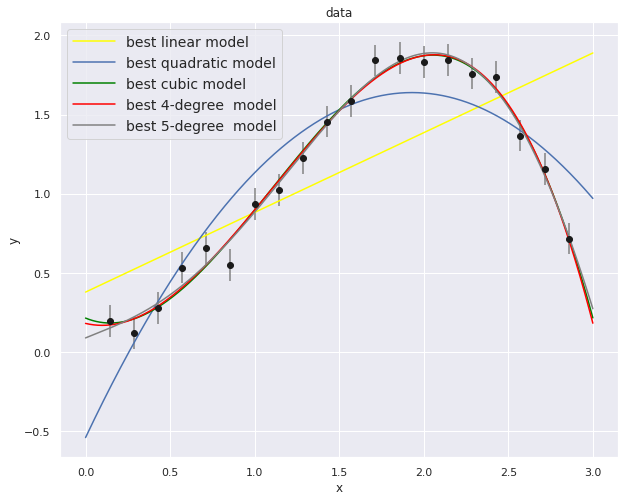

In [7]:
# generate (noisy) data
np.random.seed(0)
Ndata = 22
x = np.linspace(0, 3, Ndata)[1:-1]
sigma_y = 0.1 + 0*x
y = np.random.normal(np.sin(x) * x, sigma_y) 

# get best-fit parameters for 5 degree polynomials.
theta1 = best_theta(1,x,y,sigma_y)
theta2 = best_theta(2,x,y,sigma_y)
theta3 = best_theta(3,x,y,sigma_y)
theta4 = best_theta(4,x,y,sigma_y)
theta5 = best_theta(5,x,y,sigma_y)

# generate best fit lines on a fine grid 
xfit = np.linspace(0, 3, 1000)
yfit1 = polynomial_fit(theta1, xfit)
yfit2 = polynomial_fit(theta2, xfit)
yfit3 = polynomial_fit(theta3, xfit)
yfit4 = polynomial_fit(theta4, xfit)
yfit5 = polynomial_fit(theta5, xfit)


# and compute chi2 per degree of freedom: sum{[(y-yfit)/sigma_y]^2} 
chisquare1 = np.sum(((y-polynomial_fit(theta1, x))/sigma_y)**2) 
chisquare2 = np.sum(((y-polynomial_fit(theta2, x))/sigma_y)**2) 
chisquare3 = np.sum(((y-polynomial_fit(theta3, x))/sigma_y)**2) 
chisquare4 = np.sum(((y-polynomial_fit(theta4, x))/sigma_y)**2) 
chisquare5 = np.sum(((y-polynomial_fit(theta5, x))/sigma_y)**2) 

# the number of fitted parameters is k+1
chidof1 = chisquare1/(Ndata - 2)
chidof2 = chisquare2/(Ndata - 3)
chidof3 = chisquare3/(Ndata - 4)
chidof4 = chisquare4/(Ndata - 5)
chidof5 = chisquare5/(Ndata - 6)

### BIC = chi2 + kln(N)
BIC1 = chisquare1 + 2*np.log(Ndata)
BIC2 = chisquare2 + 3*np.log(Ndata)
BIC3 = chisquare3 + 4*np.log(Ndata)
BIC4 = chisquare4 + 5*np.log(Ndata)
BIC5 = chisquare5 + 6*np.log(Ndata)


## Creat a table
from astropy.table import Table, Column

t = Table()

t['degree'] = [1,2,3,4,5]
t['chisquare'] = [chisquare1, chisquare2, chisquare3, chisquare4, chisquare5]
t['k'] = [2,3,4,5,6]
t['k*ln(N)'] = [2*np.log(Ndata), 3*np.log(Ndata), 4*np.log(Ndata), 5*np.log(Ndata), 6*np.log(Ndata)]
t['BIC'] = [BIC1, BIC2, BIC3, BIC4, BIC5]

t['chisquare'].format = '#^.3f'
t['k*ln(N)'].format = '#^.3f'
t['BIC'].format = '#^.3f'
t.pprint(align=['^','^','^','^','^'])

# PLot results
fig, ax = plt.subplots(figsize=(10, 8))
plt.errorbar(x, y, sigma_y, fmt='ok', ecolor='gray')

ax.plot(xfit, polynomial_fit(theta1, xfit), label='best linear model', c='yellow')
ax.plot(xfit, polynomial_fit(theta2, xfit), label='best quadratic model', c='b')
ax.plot(xfit, polynomial_fit(theta3, xfit), label='best cubic model', c='green')
ax.plot(xfit, polynomial_fit(theta4, xfit), label='best 4-degree  model', c='red')
ax.plot(xfit, polynomial_fit(theta5, xfit), label='best 5-degree  model', c='grey')
ax.legend(loc='best', fontsize=14)
ax.set(xlabel='x', ylabel='y', title='data');

From the plot above, it is obvious that best cubic model, best 4-degree model, and best 5-degree model fits well. If we choose the best fitted-model using minimun chi-square method, which is the best 5-degree model in this case, the data will be over-fitted. To choose the best fit but least parameters, it is better to use minimum BIC. In this case is the best cubic model. 

## Problem 3

Apply Bayesian Blocks Algorithm to period distribution (logP) of LINEAR variable stars. Plot histograms on both linear and log scale. Compare the result to classical (Knuth's) uniform bin width histogram. 


Compare Bayesian Blocks Algorithm and classsical histogram
on a sample of periodic variable stars.

In [8]:
# fetch data
data = fetch_LINEAR_geneva()
x = data['logP']

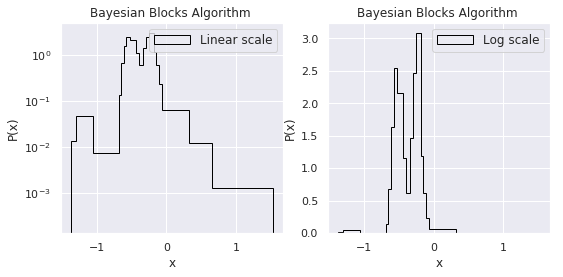

In [9]:
### Compare histogram of log(P) in linear and log scale.

fig = plt.figure(figsize=(8, 4))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

for bins, title, subplot,log in zip(['blocks', 'blocks'],
                                ['Linear scale',"Log scale"],
                                [121, 122],[True, False]):
    ax = fig.add_subplot(subplot)

    hist(x, bins=bins, ax=ax, color='black',
         histtype='step', density=True, label=title, log=log);

    ax.legend(prop=dict(size=12))
    ax.set_xlabel('x')
    ax.set_ylabel('P(x)')
    ax.set_title('Bayesian Blocks Algorithm ')    

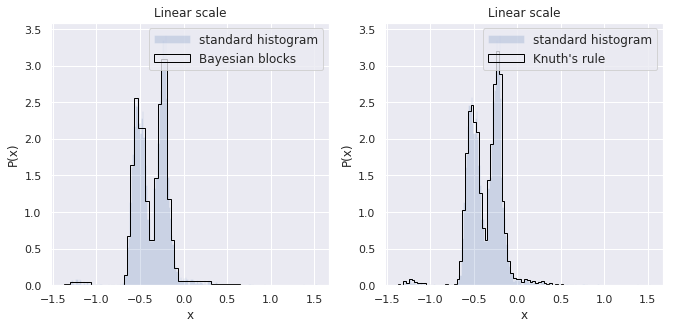

In [10]:
### Compare the linear scale log(P) histogram in  Bayesian Blocks Algorithm with classical (Knuth's) uniform bin width histogram.

fig = plt.figure(figsize=(10,5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

for bins, title, subplot in zip(['blocks', 'knuth'],
                                ['Bayesian blocks',"Knuth's rule"],
                                [121, 122]):
    ax = fig.add_subplot(subplot)

    # plot a standard histogram in the background, with alpha transparency
    hist(x, bins=200, histtype='stepfilled',
         alpha=0.2, density=True, label='standard histogram');

    # plot an adaptive-width histogram on top
    hist(x, bins=bins, ax=ax, color='black',
         histtype='step', density=True, label=title);

    ax.legend(prop=dict(size=12),loc=1)
    ax.set_xlabel('x')
    ax.set_ylabel('P(x)')
    ax.set_title('Linear scale')

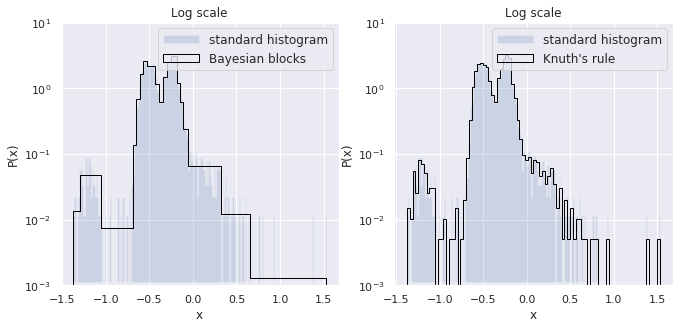

In [11]:
### Compare the log scale of log(P) histogram in  Bayesian Blocks Algorithm with classical (Knuth's) uniform bin width histogram.

fig = plt.figure(figsize=(10, 5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15)

for bins, title, subplot in zip(['blocks', 'knuth'],
                                ['Bayesian blocks',"Knuth's rule"],
                                [121, 122]):
    ax = fig.add_subplot(subplot)

    # plot a standard histogram in the background, with alpha transparency
    hist(x, bins=200, histtype='stepfilled',
         alpha=0.2, label='standard histogram', log=True,density=True);

    # plot an adaptive-width histogram on top
    hist(x, bins=bins, ax=ax, color='black',
         histtype='step', label=title, log=True,density=True);

    ax.legend(prop=dict(size=12),loc=1)
    ax.set_xlabel('x')
    ax.set_ylabel('P(x)')
    ax.set_title('Log scale')
    ax.set_ylim(10**(-3), 10 )